In [39]:
import pandas as pd
from pathlib import Path
import numpy as np
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from mpl_toolkits import mplot3d
import plotly.express as px


In [40]:
file_path = Path("Covid_FinalProject.csv")
data = pd.read_csv(file_path)
data.head()

,Country_Code,Country_Name,Continent,Population,people_fully_vaccinated,median_age,total_cases,total_deaths,life_expectancy,human_development_index,...,divorce_choice,bank_account,business_ownership,contract_signature,domestic_travel,international_travel,work_at_night,dangerous_job,industrial_job,remarry
0,ABW,Aruba,North America,106459,32884.252330,41.200000,21306.44720,142.327640,76.29,0.690681,...,0,1,1,0,1,1,1,1,1,1
1,AFG,Afghanistan,Asia,41128772,723061.459200,18.600000,122011.07150,4977.338772,64.83,0.511000,...,0,1,1,0,1,0,0,0,0,0
2,AGO,Angola,Africa,35588996,325527.213700,16.800000,56850.80497,1143.634033,61.15,0.581000,...,1,1,1,1,1,1,1,0,0,1
3,ALB,Albania,Europe,2842318,127356.554000,38.000000,175928.43510,2275.651127,78.57,0.795000,...,1,1,1,1,1,1,1,1,1,1
4,AND,Andorra,Europe,79843,1542.322455,31.888298,23705.44134,113.786325,83.73,0.868000,...,0,1,1,0,1,1,1,1,1,0


In [41]:
data.describe()

,Population,people_fully_vaccinated,median_age,total_cases,total_deaths,life_expectancy,human_development_index,aged_65_older,aged_70_older,gdp_per_capita,...,divorce_choice,bank_account,business_ownership,contract_signature,domestic_travel,international_travel,work_at_night,dangerous_job,industrial_job,remarry
count,1.400000e+02,1.400000e+02,140.000000,1.400000e+02,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,...,140.000000,140.000000,140.000000,140.00000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.127704e+07,7.405460e+06,29.863184,1.774542e+06,23995.952349,72.402429,0.715004,8.403720,5.348665,16334.325864,...,0.742857,0.971429,0.985714,0.45000,0.835714,0.921429,0.878571,0.692857,0.578571,0.614286
std,1.724716e+08,3.655886e+07,8.953890,3.985365e+06,58592.650237,7.531866,0.144684,5.946754,4.075418,15820.748758,...,0.438628,0.167197,0.119092,0.49928,0.371865,0.270035,0.327797,0.462966,0.495561,0.488511
min,4.429500e+04,7.501841e+02,16.400000,2.850259e+03,9.102564,53.280000,0.397000,1.144000,0.526000,661.240000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.729299e+06,4.331197e+04,21.875000,4.408962e+04,527.147491,66.675000,0.599250,3.450000,2.063000,3678.205750,...,0.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.162046e+07,3.574785e+05,29.100000,3.137831e+05,3966.883838,73.985000,0.731500,6.335500,3.864000,11758.663000,...,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.770706e+07,3.794095e+06,37.450000,1.705275e+06,17750.343978,77.317500,0.816250,12.071000,7.481750,22903.577500,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.425887e+09,4.209350e+08,48.200000,2.693979e+07,446247.498100,84.860000,0.955000,27.049000,18.493000,71809.251000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
#REVIEW THE DATAFRAME
display(data.head())
display(data.tail())

,Country_Code,Country_Name,Continent,Population,people_fully_vaccinated,median_age,total_cases,total_deaths,life_expectancy,human_development_index,...,divorce_choice,bank_account,business_ownership,contract_signature,domestic_travel,international_travel,work_at_night,dangerous_job,industrial_job,remarry
0,ABW,Aruba,North America,106459,32884.252330,41.200000,21306.44720,142.327640,76.29,0.690681,...,0,1,1,0,1,1,1,1,1,1
1,AFG,Afghanistan,Asia,41128772,723061.459200,18.600000,122011.07150,4977.338772,64.83,0.511000,...,0,1,1,0,1,0,0,0,0,0
2,AGO,Angola,Africa,35588996,325527.213700,16.800000,56850.80497,1143.634033,61.15,0.581000,...,1,1,1,1,1,1,1,0,0,1
3,ALB,Albania,Europe,2842318,127356.554000,38.000000,175928.43510,2275.651127,78.57,0.795000,...,1,1,1,1,1,1,1,1,1,1
4,AND,Andorra,Europe,79843,1542.322455,31.888298,23705.44134,113.786325,83.73,0.868000,...,0,1,1,0,1,1,1,1,1,0


,Country_Code,Country_Name,Continent,Population,people_fully_vaccinated,median_age,total_cases,total_deaths,life_expectancy,human_development_index,...,divorce_choice,bank_account,business_ownership,contract_signature,domestic_travel,international_travel,work_at_night,dangerous_job,industrial_job,remarry
135,VNM,Vietnam,Asia,98186856,8.165238e+06,32.6,4.476117e+06,20674.536910,75.40,0.704,...,1,1,1,1,1,1,1,1,0,1
136,YEM,Yemen,Asia,33696612,1.319377e+04,20.3,7.275854e+03,1385.856255,66.12,0.470,...,0,1,1,0,0,0,0,0,1,0
137,ZAF,South Africa,Africa,59893884,5.303941e+06,27.3,2.422739e+06,65338.485630,64.13,0.709,...,1,1,1,1,1,1,1,1,1,1
138,ZMB,Zambia,Africa,20017670,3.109541e+05,17.7,1.854350e+05,2436.299922,63.89,0.584,...,0,1,1,1,0,1,1,1,1,1
139,ZWE,Zimbabwe,Africa,16320539,9.999467e+05,19.6,1.346903e+05,3238.639472,61.49,0.571,...,0,1,1,1,1,1,1,1,1,1


In [68]:
# Separate the dependent (y) variable and independent (x) variables
y = data['total_deaths']
X = data[['cardiovasc_death_rate', 'people_fully_vaccinated']]
# Add a constant to the independent variables (for the intercept term in the regression)
X = sm.add_constant(X)
# Fit the multivariate regression model
model = sm.OLS(y, X).fit()
# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     38.66
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           4.86e-14
Time:                        21:05:46   Log-Likelihood:                -1703.8
No. Observations:                 140   AIC:                             3414.
Df Residuals:                     137   BIC:                             3422.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    3

In [72]:
y = data['people_fully_vaccinated']
X = data[['cardiovasc_death_rate']]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


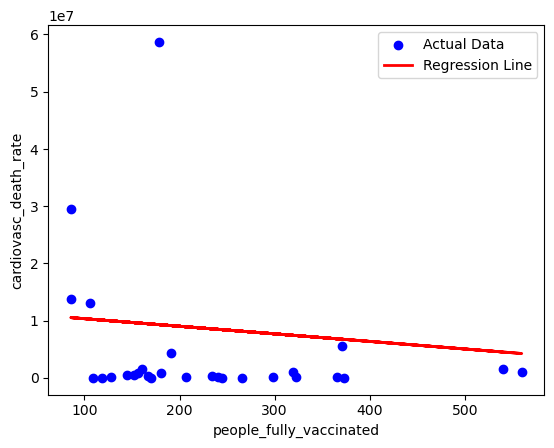

In [74]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('people_fully_vaccinated')
plt.ylabel('cardiovasc_death_rate')
plt.legend()
plt.show()

In [87]:
#test
X_a = data[['people_fully_vaccinated', 'total_deaths']]
y_a = (data['people_fully_vaccinated']/data['total_deaths'])*100

X_b = data[['cardiovasc_death_rate', 'total_deaths']]
y_b = data['cardiovasc_death_rate']/data['total_deaths']

In [88]:
#test
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
model_a = LinearRegression()
model_b = LinearRegression()
model_a.fit(X_train_a, y_train_a)
model_b.fit(X_train_b, y_train_b)
y_pred_a = model_a.predict(X_test_a)
y_pred_b = model_b.predict(X_test_b)
mae_a = mean_absolute_error(y_test_a, y_pred_a)
mae_b = mean_absolute_error(y_test_b, y_pred_b)

In [89]:
#test
print("Question a:", mae_a)
print("Question b:", mae_b)

Question a: 846421.3304739011
Question b: 0.9667438267840093


In [75]:

X_a = data[['people_fully_vaccinated', 'Population']]
y_a = (data['people_fully_vaccinated']/data['Population'])*100

X_b = data[['cardiovasc_death_rate', 'Population']]
y_b = data['cardiovasc_death_rate']/data['Population']

In [76]:
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)
model_a = LinearRegression()
model_b = LinearRegression()
model_a.fit(X_train_a, y_train_a)
model_b.fit(X_train_b, y_train_b)
y_pred_a = model_a.predict(X_test_a)
y_pred_b = model_b.predict(X_test_b)
mae_a = mean_absolute_error(y_test_a, y_pred_a)
mae_b = mean_absolute_error(y_test_b, y_pred_b)

In [77]:
print("Question a:", mae_a)
print("Question b:", mae_b)

Question a: 151.11669543554254
Question b: 0.00021496670060960226


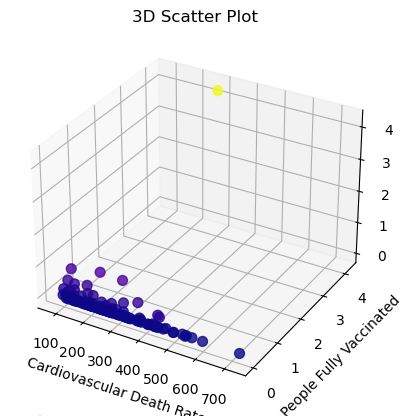

In [85]:
#create 3d scatter plot

# Get the actual x and y values from 'data'
x_data = data['cardiovasc_death_rate']
y_data = data['people_fully_vaccinated']
z_data = y  # 'total_deaths' is represented as the z-axis

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax.scatter(x_data, y_data, z_data, c=z_data, cmap='plasma', s=50, alpha=0.8)

# Set labels and title
ax.set_xlabel('Cardiovascular Death Rate')
ax.set_ylabel('People Fully Vaccinated')
ax.set_zlabel('Total Deaths')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()


